<h1 style="color: rgb(0, 0, 0);">Outliers</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


This notebook contains the exercises for the topic on Outliers

In [96]:
# Numerical arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import scipy.stats as ss

# csv, tabular data
import csv
import pandas as pd

## Exercise 1
### Box plots of the Morley data set

Create box plots on a single set of axes for all five experiments in the morley data set.

In [3]:
# An explanation of the dataset:
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/morley.html

# The below code breaks when reading the header line, so we need to pass parameter skip header
file = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/morley.csv'

# Read in Morley data.
data = np.genfromtxt(file, skip_header=1, delimiter=',')
# Remove the first column.
# : means 'this is what I want from first index' - which is outer array.
# 1: means 'this is what I want from second index' - which is inner array.
data = data[:,1:]
#print(data)

# Select the data for the first experiment - column at index 2. First 20 values
# Because there were 20 runs and 5 experiments
# Code below is up to, not including 20 (0 - 19)
exper_1 = data[:20, 2]

exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [4]:
# Select the data for the second experiment
exper_2 = data[20:40, 2]
exper_2

array([960., 940., 960., 940., 880., 800., 850., 880., 900., 840., 830.,
       790., 810., 880., 880., 830., 800., 790., 760., 800.])

In [5]:
# Select the data for the third experiment
exper_3 = data[40:60, 2]
exper_3

array([880., 880., 880., 860., 720., 720., 620., 860., 970., 950., 880.,
       910., 850., 870., 840., 840., 850., 840., 840., 840.])

In [6]:
# Select the data for the fourth experiment
exper_4 = data[60:80, 2]
exper_4

array([890., 810., 810., 820., 800., 770., 760., 740., 750., 760., 910.,
       920., 890., 860., 880., 720., 840., 850., 850., 780.])

In [7]:
# Select the data for the fifth experiment
exper_5 = data[80:100, 2]
exper_5

array([890., 840., 780., 810., 760., 810., 790., 810., 820., 850., 870.,
       870., 810., 740., 810., 940., 950., 800., 810., 870.])

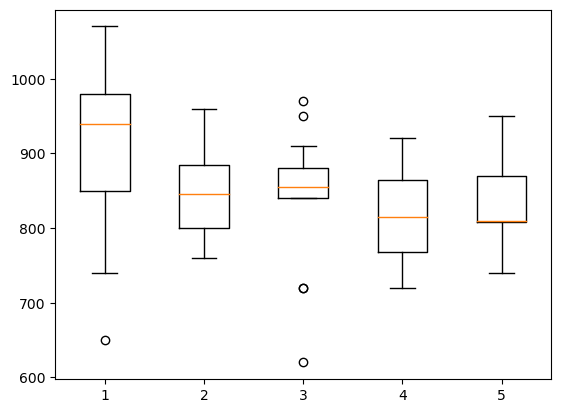

In [9]:
# Create a box plot
# ; at end of line stops the object details being printed
#plt.boxplot(exper_1);
# .T means transpose
plt.boxplot(np.array([exper_1, exper_2, exper_3, exper_4, exper_5]).T);

Although the plot above shows the outliers, we can also go a step further and display the maximum and minimum whisker length for each box plot. To do this we need the inter-quartile range for each experiment.

### Inter-Quartile Range of Experiment 1

In [30]:
# Inter-quartile range of experiment 1.
iqr_ex1 = np.percentile(exper_1, 75) - np.percentile(exper_1, 25)

# Upper Quartile value
q3_ex1 = np.percentile(exper_1, 75)

# lower quartile value:
q1_ex1 = np.percentile(exper_1, 25)

# Max upper whisker:
q3_ex1 + iqr_ex1

# Min lower whisker:
q1_ex1 - iqr_ex1

720.0

### Inter-Quartile Range of Experiment 2

In [31]:
# Inter-quartile range of experiment 2.
iqr_ex2 = np.percentile(exper_2, 75) - np.percentile(exper_2, 25)

# Upper Quartile value
q3_ex2 = np.percentile(exper_2, 75)

# lower quartile value:
q1_ex2 = np.percentile(exper_2, 25)

# Max upper whisker:
q3_ex2 + iqr_ex2

# Min lower whisker:
q1_ex2 - iqr_ex2

715.0

### Inter-Quartile Range of Experiment 3

In [35]:
# Inter-quartile range of experiment 3.
iqr_ex3 = np.percentile(exper_3, 75) - np.percentile(exper_3, 25)

# Upper Quartile value
q3_ex3 = np.percentile(exper_3, 75)

# lower quartile value:
q1_ex3= np.percentile(exper_3, 25)

# Max upper whisker:
q3_ex3 + iqr_ex3

# Min lower whisker:
q1_ex3 - iqr_ex3

800.0

### Inter-Quartile Range of Experiment 4

In [37]:
# Inter-quartile range of experiment 4.
iqr_ex4 = np.percentile(exper_4, 75) - np.percentile(exper_4, 25)

# Upper Quartile value
q3_ex4 = np.percentile(exper_4, 75)

# lower quartile value:
q1_ex4= np.percentile(exper_4, 25)

# Max upper whisker:
q3_ex4 + iqr_ex4

# Min lower whisker:
q1_ex4 - iqr_ex4

670.0

### Inter-Quartile Range of Experiment 5

In [39]:
# Inter-quartile range of experiment 5.
iqr_ex5 = np.percentile(exper_5, 75) - np.percentile(exper_5, 25)

# Upper Quartile value
q3_ex5 = np.percentile(exper_5, 75)

# lower quartile value:
q1_ex5= np.percentile(exper_5, 25)

# Max upper whisker:
q3_ex5 + iqr_ex5

# Min lower whisker:
q1_ex5 - iqr_ex5

745.0

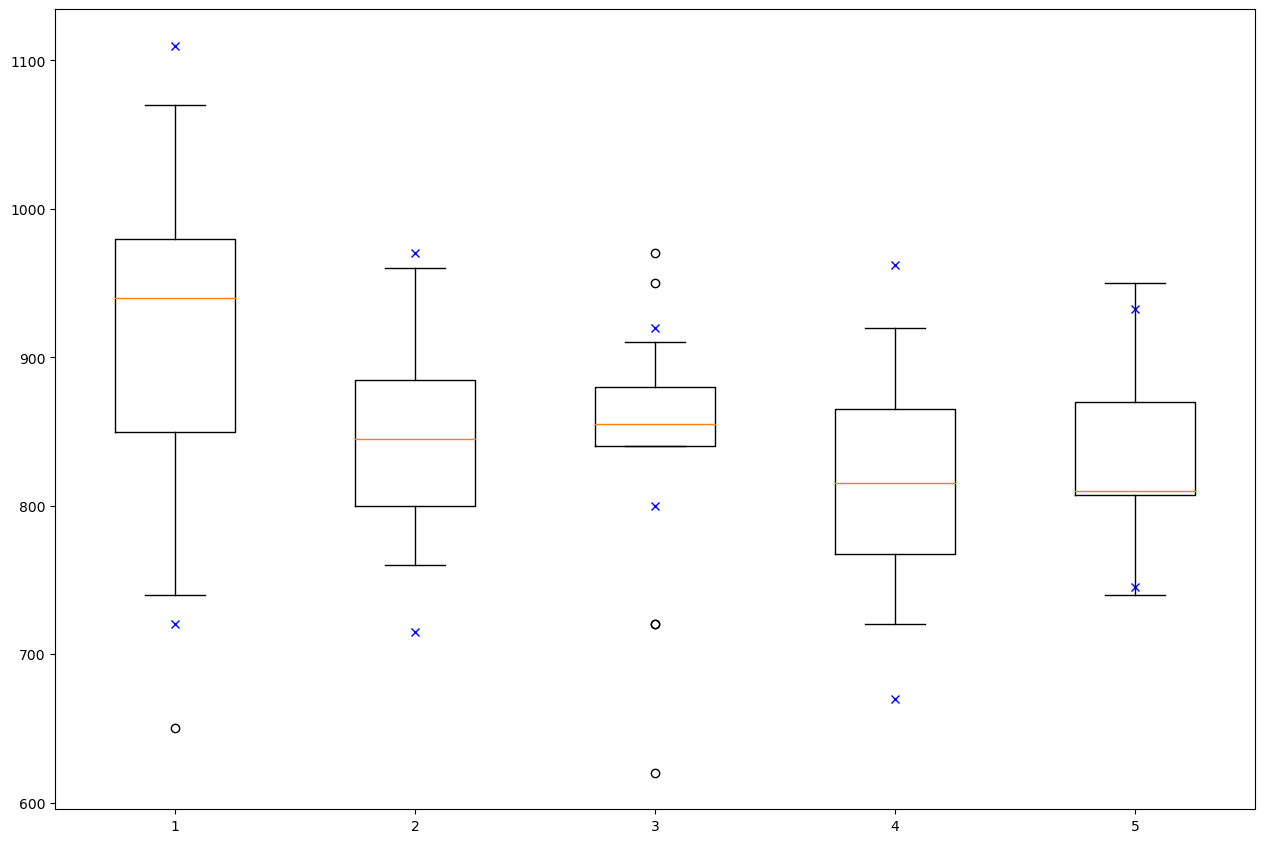

In [40]:
# Another way to plot the box plots 
data = [exper_1, exper_2, exper_3, exper_4, exper_5]

# Bigger plot
fig = plt.figure(figsize =(12, 8))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Add the data for experiment 1
ax.plot([1.0, 1.0], [q1_ex1 - iqr_ex1, q3_ex1 + iqr_ex1], 'bx'); 

# Add the data for experiment 2
ax.plot([2.0, 2.0], [q1_ex2 - iqr_ex2, q3_ex2 + iqr_ex2], 'bx'); 

# Add the data for experiment 3
ax.plot([3.0, 3.0], [q1_ex3 - iqr_ex3, q3_ex3 + iqr_ex3], 'bx'); 

# Add the data for experiment 4
ax.plot([4.0, 4.0], [q1_ex4 - iqr_ex4, q3_ex4 + iqr_ex4], 'bx');

# Add the data for experiment 5
ax.plot([5.0, 5.0], [q1_ex5 - iqr_ex5, q3_ex5 + iqr_ex5], 'bx');

# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

So above we have the box plots for all the experiments as well as the theoretical maximum and minimum values for the whiskers (blue crosses).

## Exercise 2

Create box plots for all of the numerical variables in Fisher's Iris Data Set.
The first way will use pandas to illustrate the speed/minimal code.

The second way will do it as it was done in the lecture.

In [92]:
# Import csv
#iris = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'

iris = 'data/iris.csv'
#data = np.genfromtxt(iris,delimiter='')

#data
# go through each variable
# box plots

In [94]:
df = pd.read_csv(iris)
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [106]:
# Basic statistics for each variable.
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


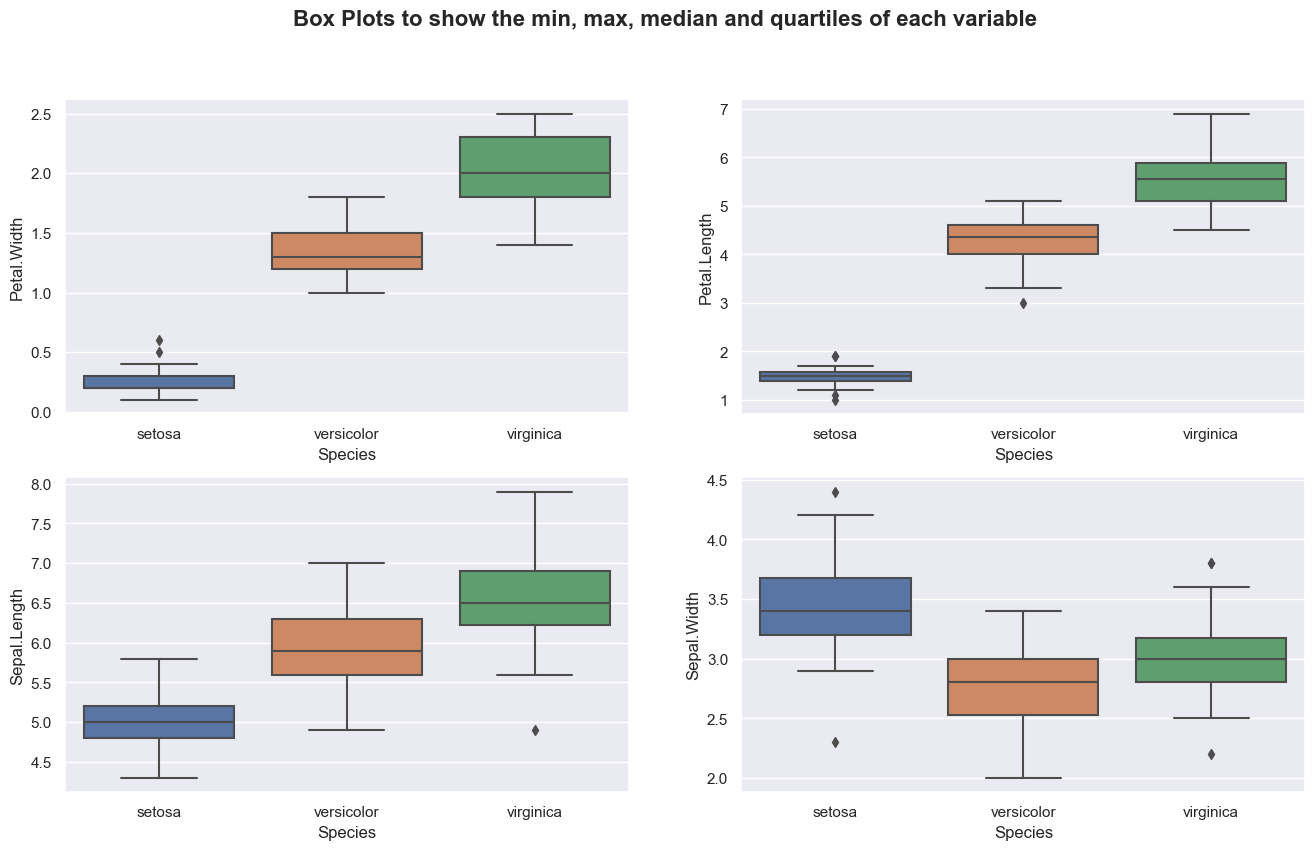

In [75]:
# Box plots to show the median and the quartiles of each variable.
sns.set(style="darkgrid")
#sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(16,9))
fig.suptitle("Box Plots to show the min, max, median and quartiles of each variable", fontsize = 16, fontweight='bold')
sns.boxplot( y='Petal.Width', x= 'Species', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='Petal.Length', x= 'Species', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='Sepal.Length', x= 'Species', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='Sepal.Width', x= 'Species', data=df, orient='v' , ax=axes[1, 1])
plt.show()

Now for the second way as per lectures

In [98]:
with open("data/iris.csv", 'r') as x:
    iris_data = list(csv.reader(x, delimiter=","))

# Convert to numpy array
iris_data = np.array(iris_data)
#iris_data

In [102]:
# First 50 rows
fisher1 = iris_data[0:50, 1]
fisher1

array(['Sepal.Length', '5.1', '4.9', '4.7', '4.6', '5', '5.4', '4.6', '5',
       '4.4', '4.9', '5.4', '4.8', '4.8', '4.3', '5.8', '5.7', '5.4',
       '5.1', '5.7', '5.1', '5.4', '5.1', '4.6', '5.1', '4.8', '5', '5',
       '5.2', '5.2', '4.7', '4.8', '5.4', '5.2', '5.5', '4.9', '5', '5.5',
       '4.9', '4.4', '5.1', '5', '4.5', '4.4', '5', '5.1', '4.8', '5.1',
       '4.6', '5.3'], dtype='<U12')

Below variables are grouped by species

In [203]:
# Group by variables/species

# Sepal Length - Species
sepal_length_setosa = iris_data[1:50, 1]
sepal_length_versicolor = iris_data[50:100, 1]
sepal_length_virginica = iris_data[100:150, 1]

# Sepal Width - Species
sepal_width_setosa = iris_data[1:50, 2]
sepal_width_versicolor = iris_data[50:100, 2]
sepal_width_virginica = iris_data[100:150, 2]

# Petal Length - Species
petal_length_setosa = iris_data[1:50, 3]
petal_length_versicolor = iris_data[50:100, 3]
petal_length_virginica = iris_data[100:150, 3]

# Petal Width - Species
petal_width_setosa = iris_data[1:50, 4]
petal_width_versicolor = iris_data[50:100, 4]
petal_width_virginica = iris_data[100:150, 4]

### Sepal Length - Setosa

In [155]:
# Remove the column header and rename as something that makes sense
sepal_length_setosa = sepal_length_setosa.astype(np.float64)
sepal_length_setosa
#type(sepal_length_setosa)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3])

In [156]:
# The sepal length values, but sorted in order.
np.sort(sepal_length_setosa)

array([4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.8, 4.8,
       4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 5. , 5. , 5. , 5. , 5. , 5. ,
       5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.3,
       5.4, 5.4, 5.4, 5.4, 5.4, 5.5, 5.5, 5.7, 5.7, 5.8])

In [177]:
# Calculate mean, median, inter-quartile range, abbreviate as sls_<name>
# mean- abbreviate as sls_mean
sls_mean = np.mean(sepal_length_setosa)
sls_mean

# median
sls_median = np.median(sepal_length_setosa)

# Inter-quartile range.
sls_iqr = np.percentile(sepal_length_setosa, 75) - np.percentile(sepal_length_setosa, 25)

# Upper Quartile value
sls_q3 = np.percentile(sepal_length_setosa, 75)

# lower quartile value:
sls_q1 = np.percentile(sepal_length_setosa, 25)

# Max upper whisker:
sls_q3 + sls_iqr

# Min lower whisker:
sls_q1 - sls_iqr

4.3999999999999995

### Sepal Length - Versicolor

In [160]:
# Change data type to float
sepal_length_versicolor = sepal_length_versicolor.astype(np.float64)
#print(type(sepal_length_versicolor))

# The sepal length values, but sorted in order.
np.sort(sepal_length_versicolor)

array([4.9, 5. , 5. , 5. , 5.1, 5.2, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6,
       5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9,
       6. , 6. , 6. , 6. , 6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.3, 6.3, 6.3,
       6.4, 6.4, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.8, 6.9, 7. ])

In [162]:
# Calculate mean, median, inter-quartile range, abbreviate as slve_<name>
# mean- abbreviate as slve_mean
slve_mean = np.mean(sepal_length_versicolor)

# median
slve_median = np.median(sepal_length_versicolor)

# Inter-quartile range.
slve_iqr = np.percentile(sepal_length_versicolor, 75) - np.percentile(sepal_length_versicolor, 25)

# Upper Quartile value
slve_q3 = np.percentile(sepal_length_versicolor, 75)

# lower quartile value:
slve_q1 = np.percentile(sepal_length_versicolor, 25)

# Max upper whisker:
slve_q3 + slve_iqr

# Min lower whisker:
slve_q1 - slve_iqr

4.8999999999999995

### Sepal Length - Virginica

In [163]:
# Change data type to float
sepal_length_virginica = sepal_length_virginica.astype(np.float64)

# The sepal length values, but sorted in order.
np.sort(sepal_length_virginica)

array([4.9, 5.6, 5.7, 5.7, 5.8, 5.8, 5.8, 6. , 6. , 6.1, 6.1, 6.2, 6.2,
       6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5,
       6.5, 6.5, 6.7, 6.7, 6.7, 6.7, 6.7, 6.8, 6.8, 6.9, 6.9, 6.9, 7.1,
       7.2, 7.2, 7.2, 7.3, 7.4, 7.6, 7.7, 7.7, 7.7, 7.7, 7.9])

In [164]:
# Calculate mean, median, inter-quartile range, abbreviate as slvi_<name>
# mean- abbreviate as slvi_mean

slvi_mean = np.mean(sepal_length_virginica)

# median
slvi_median = np.median(sepal_length_virginica)

# Inter-quartile range.
slvi_iqr = np.percentile(sepal_length_virginica, 75) - np.percentile(sepal_length_virginica, 25)

# Upper Quartile value
slvi_q3 = np.percentile(sepal_length_virginica, 75)

# lower quartile value:
slvi_q1 = np.percentile(sepal_length_virginica, 25)

# Max upper whisker:
slvi_q3 + slvi_iqr

# Min lower whisker:
slvi_q1 - slvi_iqr

5.549999999999999

## Box plots of the sepal lengths of the three species

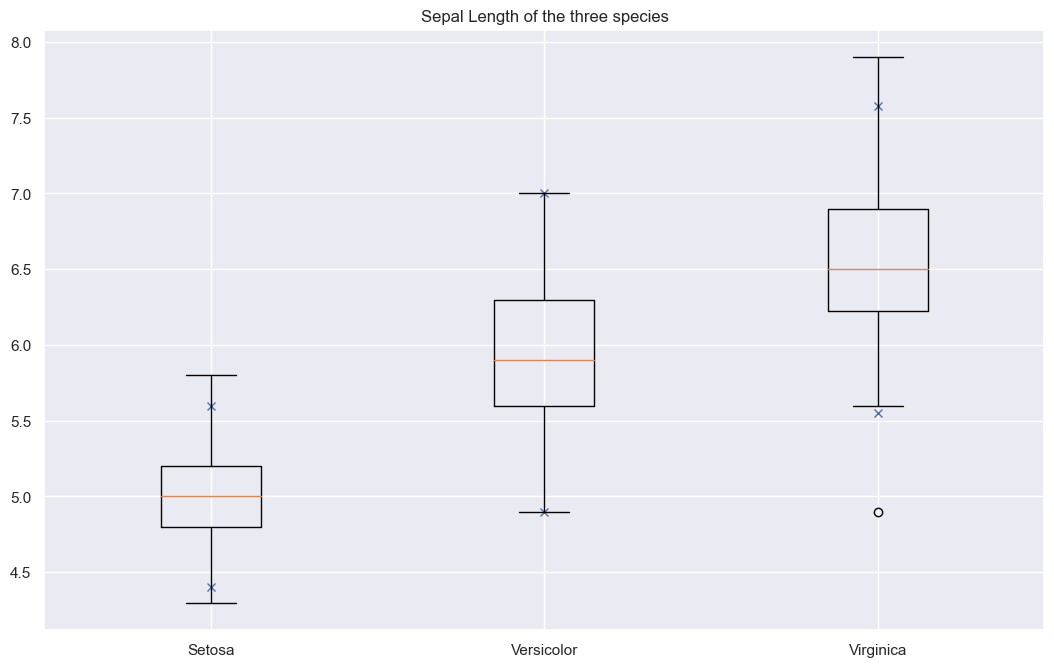

In [178]:
# Another way to plot the box plots 
data1 = [sepal_length_setosa, sepal_length_versicolor, sepal_length_virginica]

# Bigger plot
fig = plt.figure(figsize = (10, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Add the data for Sepal Length, Setosa:
ax.plot([1.0, 1.0], [sls_q1 - sls_iqr, sls_q3 + sls_iqr], 'bx')

# Add the data for Sepal Length, Versicolor:
ax.plot([2.0, 2.0], [slve_q1 - slve_iqr, slve_q3 + slve_iqr], 'bx')

# Add the data for Sepal Length, Virginica:
ax.plot([3.0, 3.0], [slvi_q1 - slvi_iqr, slvi_q3 + slvi_iqr], 'bx')

# Creating plot
irs_bp = ax.boxplot(data1)

# Title
ax.set_title('Sepal Length of the three species')

plt.xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"])
# show plot
plt.show()

### Sepal Width - Setosa


In [220]:
# Change data type to float
sepal_width_setosa = sepal_width_setosa.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(sepal_width_setosa)

array([2.3, 2.9, 3. , 3. , 3. , 3. , 3. , 3. , 3.1, 3.1, 3.1, 3.1, 3.2,
       3.2, 3.2, 3.2, 3.2, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4,
       3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7,
       3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 4. , 4.1, 4.2, 4.4])

In [221]:
# Calculate mean, median, inter-quartile range, abbreviate as sws_<name>
# mean- abbreviate as sws_mean
sws_mean = np.mean(sepal_width_setosa)

# median
sws_median = np.median(sepal_width_setosa)

# Inter-quartile range.
sws_iqr = np.percentile(sepal_width_setosa, 75) - np.percentile(sepal_width_setosa, 25)

# Upper Quartile value
sws_q3 = np.percentile(sepal_width_setosa, 75)

# lower quartile value:
sws_q1 = np.percentile(sepal_width_setosa, 25)

# Max upper whisker:
sws_q3 + sws_iqr

# Min lower whisker:
sws_q1 - sws_iqr

2.7

### Sepal Width - Versicolor

In [222]:
# Change data type to float
sepal_width_versicolor = sepal_width_versicolor.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(sepal_width_versicolor)

array([2. , 2.2, 2.2, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5, 2.5,
       2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8,
       2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 3. , 3. , 3. , 3. , 3. , 3. ,
       3. , 3. , 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.3, 3.3, 3.4])

In [223]:
# Calculate mean, median, inter-quartile range, abbreviate as swv_<name>
# mean- abbreviate as swv_mean
swv_mean = np.mean(sepal_width_versicolor)

# median
swv_median = np.median(sepal_width_versicolor)

# Inter-quartile range.
swv_iqr = np.percentile(sepal_width_versicolor, 75) - np.percentile(sepal_width_versicolor, 25)

# Upper Quartile value
swv_q3 = np.percentile(sepal_width_versicolor, 75)

# lower quartile value:
swv_q1 = np.percentile(sepal_width_versicolor, 25)

# Max upper whisker:
swv_q3 + swv_iqr

# Min lower whisker:
swv_q1 - swv_iqr

2.05

### Sepal Width - Virginica

In [224]:
# Change data type to float
sepal_width_virginica = sepal_width_virginica.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(sepal_width_virginica)

array([2.2, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 3. , 3. , 3. , 3. ,
       3. , 3. , 3. , 3. , 3. , 3. , 3. , 3.1, 3.1, 3.1, 3.1, 3.2, 3.2,
       3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.4, 3.4, 3.6, 3.8, 3.8])

In [225]:
# Calculate mean, median, inter-quartile range, abbreviate as swvi_<name>
# mean- abbreviate as swvi_mean
swvi_mean = np.mean(sepal_width_virginica)

# median
swvi_median = np.median(sepal_width_virginica)

# Inter-quartile range.
swvi_iqr = np.percentile(sepal_width_virginica, 75) - np.percentile(sepal_width_virginica, 25)

# Upper Quartile value
swvi_q3 = np.percentile(sepal_width_virginica, 75)

# lower quartile value:
swvi_q1 = np.percentile(sepal_width_virginica, 25)

# Max upper whisker:
swvi_q3 + swvi_iqr

# Min lower whisker:
swvi_q1 - swvi_iqr

2.4249999999999994

## Box plots of the sepal widths of the three species

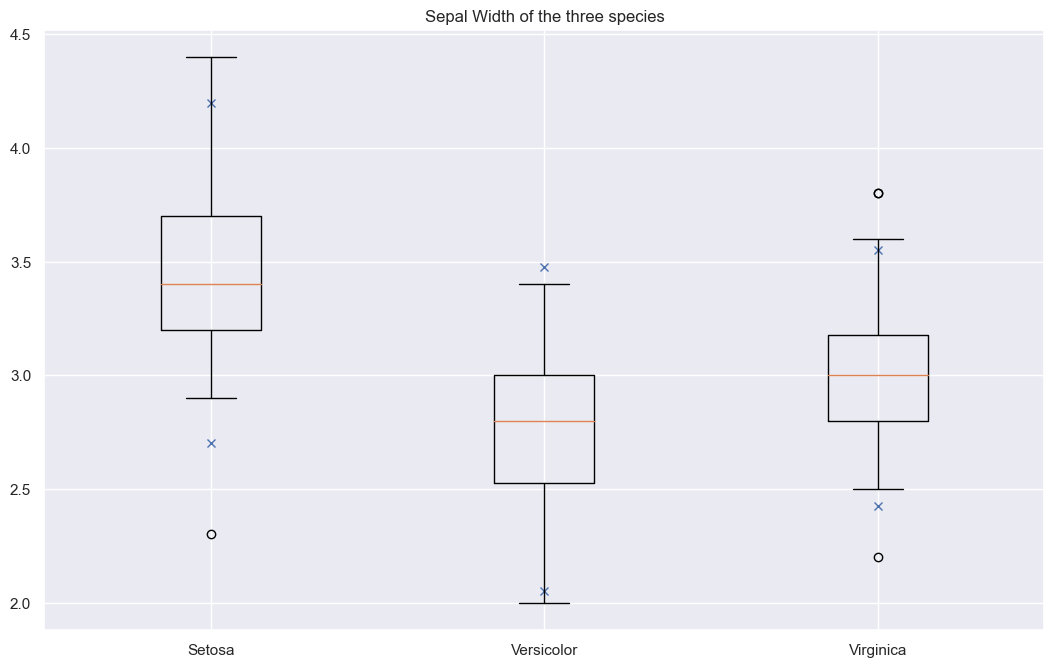

In [226]:
# Another way to plot the box plots 
data2 = [sepal_width_setosa, sepal_width_versicolor, sepal_width_virginica]

# Bigger plot
fig = plt.figure(figsize = (10, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Add the data for Sepal Width, Setosa:
ax.plot([1.0, 1.0], [sws_q1 - sws_iqr, sws_q3 + sws_iqr], 'bx')

# Add the data for Sepal Width, Versicolor:
ax.plot([2.0, 2.0], [swv_q1 - swv_iqr, swv_q3 + swv_iqr], 'bx')

# Add the data for Sepal Length, Virginica:
ax.plot([3.0, 3.0], [swvi_q1 - swvi_iqr, swvi_q3 + swvi_iqr], 'bx')

# Creating plot
irs_bp = ax.boxplot(data2)

# Title
ax.set_title('Sepal Width of the three species')

plt.xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"])
# show plot
plt.show()

### Petal Length - Setosa

In [227]:
# Change data type to float
petal_length_setosa = petal_length_setosa.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(petal_length_setosa)

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9])

In [228]:
# Calculate mean, median, inter-quartile range, abbreviate as pls_<name>
# mean- abbreviate as pls_mean
pls_mean = np.mean(petal_length_setosa)

# median
pls_median = np.median(petal_length_setosa)

# Inter-quartile range.
pls_iqr = np.percentile(petal_length_setosa, 75) - np.percentile(petal_length_setosa, 25)

# Upper Quartile value
pls_q3 = np.percentile(petal_length_setosa, 75)

# lower quartile value:
pls_q1 = np.percentile(petal_length_setosa, 25)

# Max upper whisker:
pls_q3 + pls_iqr

# Min lower whisker:
pls_q1 - pls_iqr

1.1999999999999997

### Petal Length - Versicolor

In [229]:
# Change data type to float
petal_length_versicolor = petal_length_versicolor.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(petal_length_versicolor)

array([1.4, 3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. ,
       4. , 4. , 4. , 4. , 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
       4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
       4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5. , 5.1])

In [230]:
# Calculate mean, median, inter-quartile range, abbreviate as plv_<name>
# mean- abbreviate as plv_mean
plv_mean = np.mean(petal_length_versicolor)

# median
plv_median = np.median(petal_length_versicolor)

# Inter-quartile range.
plv_iqr = np.percentile(petal_length_versicolor, 75) - np.percentile(petal_length_versicolor, 25)

# Upper Quartile value
plv_q3 = np.percentile(petal_length_versicolor, 75)

# lower quartile value:
plv_q1 = np.percentile(petal_length_versicolor, 25)

# Max upper whisker:
plv_q3 + plv_iqr

# Min lower whisker:
plv_q1 - plv_iqr

3.4000000000000004

### Petal Length - Virginica

In [231]:
# Change data type to float
petal_length_virginica = petal_length_virginica.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(petal_length_virginica)

array([4.1, 4.5, 4.8, 4.8, 4.9, 4.9, 4.9, 5. , 5. , 5. , 5.1, 5.1, 5.1,
       5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6,
       5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9,
       6. , 6. , 6.1, 6.1, 6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9])

In [232]:
# Calculate mean, median, inter-quartile range, abbreviate as plvi_<name>
# mean- abbreviate as plvi_mean
plvi_mean = np.mean(petal_length_virginica)

# median
plvi_median = np.median(petal_length_virginica)

# Inter-quartile range.
plvi_iqr = np.percentile(petal_length_virginica, 75) - np.percentile(petal_length_virginica, 25)

# Upper Quartile value
plvi_q3 = np.percentile(petal_length_virginica, 75)

# lower quartile value:
plvi_q1 = np.percentile(petal_length_virginica, 25)

# Max upper whisker:
plvi_q3 + plvi_iqr

# Min lower whisker:
plvi_q1 - plvi_iqr

4.324999999999999

### Box plots of the petal lengths of the three species

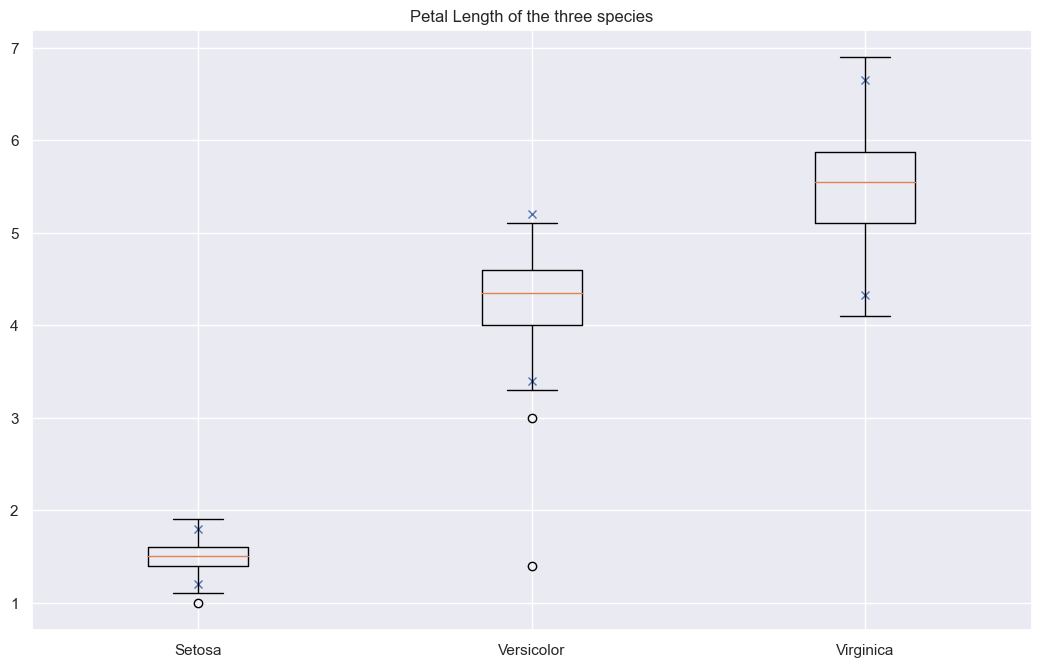

In [233]:
# Another way to plot the box plots 
data3 = [petal_length_setosa, petal_length_versicolor, petal_length_virginica]

# Bigger plot
fig = plt.figure(figsize = (10, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Add the data for Sepal Width, Setosa:
ax.plot([1.0, 1.0], [pls_q1 - pls_iqr, pls_q3 + pls_iqr], 'bx')

# Add the data for Sepal Width, Versicolor:
ax.plot([2.0, 2.0], [plv_q1 - plv_iqr, plv_q3 + plv_iqr], 'bx')

# Add the data for Sepal Length, Virginica:
ax.plot([3.0, 3.0], [plvi_q1 - plvi_iqr, plvi_q3 + plvi_iqr], 'bx')

# Creating plot
irs_bp = ax.boxplot(data3)

# Title
ax.set_title('Petal Length of the three species')

plt.xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"])
# show plot
plt.show()

### Petal Width - Setosa

In [234]:
# Change data type to float
petal_width_setosa = petal_width_setosa.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(petal_width_setosa)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6])

In [235]:
# Calculate mean, median, inter-quartile range, abbreviate as pws_<name>
# mean- abbreviate as plvi_mean
pws_mean = np.mean(petal_width_setosa)

# median
pws_median = np.median(petal_width_setosa)

# Inter-quartile range.
pws_iqr = np.percentile(petal_width_setosa, 75) - np.percentile(petal_width_setosa, 25)

# Upper Quartile value
pws_q3 = np.percentile(petal_width_setosa, 75)

# lower quartile value:
pws_q1 = np.percentile(petal_width_setosa, 25)

# Max upper whisker:
pws_q3 + pws_iqr

# Min lower whisker:
pws_q1 - pws_iqr

0.10000000000000003

### Petal Width - Versicolor

In [236]:
# Change data type to float
petal_width_versicolor = petal_width_versicolor.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(petal_width_versicolor)

array([0.2, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.2, 1.2,
       1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3,
       1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.7, 1.8])

In [237]:
# Calculate mean, median, inter-quartile range, abbreviate as pwv_<name>
# mean- abbreviate as pwv_mean
pwv_mean = np.mean(petal_width_versicolor)

# median
pwv_median = np.median(petal_width_versicolor)

# Inter-quartile range.
pwv_iqr = np.percentile(petal_width_versicolor, 75) - np.percentile(petal_width_versicolor, 25)

# Upper Quartile value
pwv_q3 = np.percentile(petal_width_versicolor, 75)

# lower quartile value:
pwv_q1 = np.percentile(petal_width_versicolor, 25)

# Max upper whisker:
pwv_q3 + pwv_iqr

# Min lower whisker:
pwv_q1 - pwv_iqr

0.8999999999999999

### Petal Width - Virginica

In [238]:
# Change data type to float
petal_width_virginica = petal_width_virginica.astype(np.float64)

# The sepal width values, but sorted in order.
np.sort(petal_width_virginica)

array([1.3, 1.4, 1.5, 1.5, 1.6, 1.7, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8,
       1.8, 1.8, 1.8, 1.9, 1.9, 1.9, 1.9, 1.9, 2. , 2. , 2. , 2. , 2. ,
       2. , 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3,
       2.3, 2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5])

In [239]:
# Calculate mean, median, inter-quartile range, abbreviate as pwvi_<name>
# mean- abbreviate as pwvi_mean
pwvi_mean = np.mean(petal_width_virginica)

# median
pwvi_median = np.median(petal_width_virginica)

# Inter-quartile range.
pwvi_iqr = np.percentile(petal_width_virginica, 75) - np.percentile(petal_width_virginica, 25)

# Upper Quartile value
pwvi_q3 = np.percentile(petal_width_virginica, 75)

# lower quartile value:
pwvi_q1 = np.percentile(petal_width_virginica, 25)

# Max upper whisker:
pwvi_q3 + pwvi_iqr

# Min lower whisker:
pwvi_q1 - pwvi_iqr

1.3000000000000003

### Box plots of petal widths of the three species

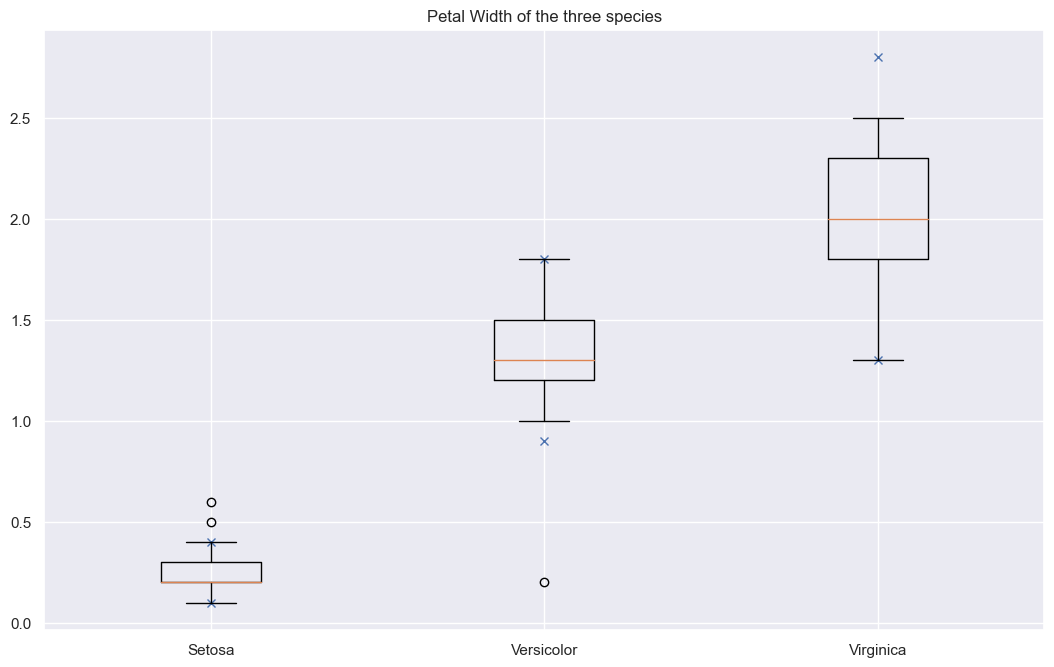

In [240]:
# Another way to plot the box plots 
data4 = [petal_width_setosa, petal_width_versicolor, petal_width_virginica]

# Bigger plot
fig = plt.figure(figsize = (10, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Add the data for Sepal Width, Setosa:
ax.plot([1.0, 1.0], [pws_q1 - pws_iqr, pws_q3 + pws_iqr], 'bx')

# Add the data for Sepal Width, Versicolor:
ax.plot([2.0, 2.0], [pwv_q1 - pwv_iqr, pwv_q3 + pwv_iqr], 'bx')

# Add the data for Sepal Length, Virginica:
ax.plot([3.0, 3.0], [pwvi_q1 - pwvi_iqr, pwvi_q3 + pwvi_iqr], 'bx')

# Creating plot
irs_bp = ax.boxplot(data4)

# Title
ax.set_title('Petal Width of the three species')

plt.xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"])
# show plot
plt.show()

## Exercise 3 - Simpson's Paradox

Adapt the code from the lecture and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

As a straight line can be expressed by:
$$y = mx + c$$
A negative gradient is needed (negative m)

In [259]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])


In [303]:
import math
# Create a corresponding series of y vectors.
ys = np.array([1.0 * xs[i] - 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

In [304]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

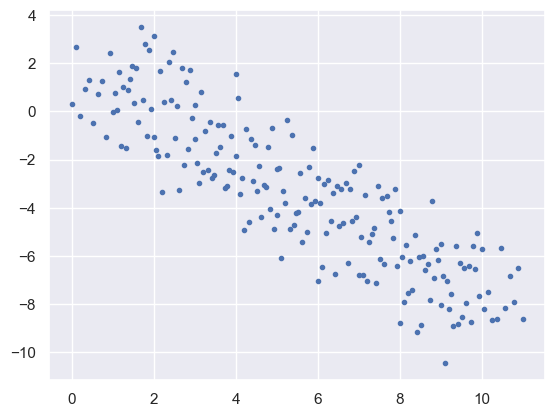

In [305]:
# Plot.
plt.plot(x, y, '.');

### Best Fit line

Draw a line of best fit for the above data.

In [306]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

In [307]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

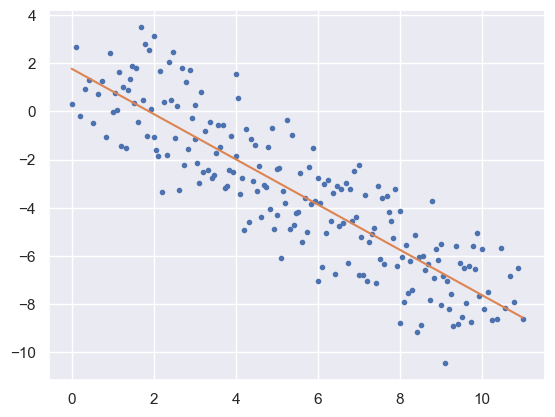

In [308]:
# Plot points.
plt.plot(x, y, '.')

# Plot line.
plt.plot(xbestfit, ybestfit);

Add colours to see each range of numbers

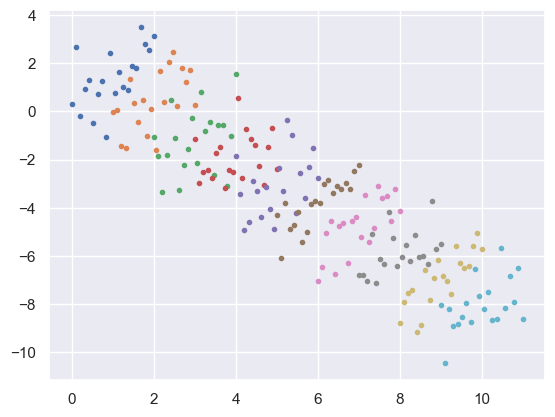

In [309]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')

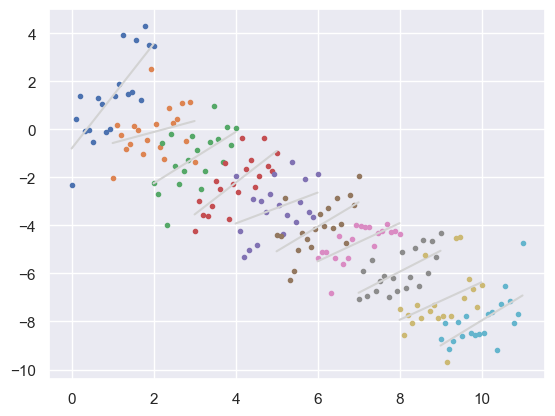

In [296]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

It can be seen from the above that although for the overall data a line of best fit was found, when the data was categorised and a line of best fit plotted for each category, that it was actually the opposite to the previous line of best fit.

## References

1. [Ian's notebook on Bias](https://github.com/ianmcloughlin/2223-S1-fund-data-analysis/blob/main/notebooks/04-outliers.ipynb)
2. [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)
3. [An explanation of the Morley data set](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/morley.html)
4. [Where to get Morley's data set](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)
5. [Wikipedia's explanation of box plots](https://en.wikipedia.org/wiki/Box_plot)